In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
Data_Path = pd.read_csv("C:/Users/HP/Downloads/ACME-HappinessSurvey2020.csv")

print(Data_Path)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [7]:
Data_Path.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [8]:
Data_Path.tail(10)

,Y,X1,X2,X3,X4,X5,X6
116,1,3,4,4,5,1,3
117,1,5,1,5,5,5,5
118,1,4,3,3,4,4,4
119,1,5,5,1,1,5,1
120,0,4,4,4,4,1,3
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [9]:
#EDA

Data_Path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [64]:
from sklearn.model_selection import train_test_split

DataLabeling = Data_Path.values
x = DataLabeling[:, 1:7] 
y = Data_Path['Y']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 6)

In [65]:
#Data_Shape

trainX.shape

(100, 6)

In [66]:
testX.shape

(26, 6)

# Naive Bayes Algorithm

In [67]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes_Model = GaussianNB()

NaiveBayes_Model.fit(trainX, trainY)

NaiveBayes_prediction = NaiveBayes_Model.predict(testX)

In [68]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


print("Accuracy", accuracy_score(testY, NaiveBayes_prediction))
print("F1 Score", f1_score(testY, NaiveBayes_prediction))
print("Precision Score", precision_score(testY, NaiveBayes_prediction))
print("recall Score", recall_score(testY, NaiveBayes_prediction))

Accuracy 0.5384615384615384
F1 Score 0.6470588235294117
Precision Score 0.7333333333333333
recall Score 0.5789473684210527


In [69]:
confusion_matrix(testY, NaiveBayes_prediction)

array([[ 3,  4],
       [ 8, 11]], dtype=int64)

<AxesSubplot:>

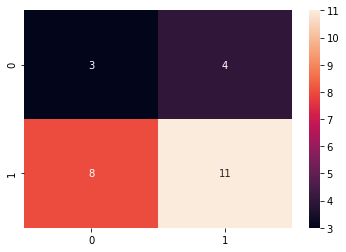

In [70]:
import seaborn as sns

sns.heatmap(confusion_matrix(testY, NaiveBayes_prediction),annot=True)

# SVM Algorithm

In [71]:
from sklearn import svm

classifer = svm.SVC()

In [72]:
classifer.fit(trainX, trainY)

SVC()

In [73]:
SVM_prediction = classifer.predict(testX)

In [74]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

print("Accuracy", accuracy_score(testY, predictionY))
print("F1 Score", f1_score(testY, predictionY))
print("precision Score", precision_score(testY, predictionY))
print("recall Score", recall_score(testY, predictionY))

Accuracy 0.5384615384615384
F1 Score 0.625
precision Score 0.7692307692307693
recall Score 0.5263157894736842


In [75]:
confusion_matrix(testY, SVM_prediction)

array([[ 3,  4],
       [ 9, 10]], dtype=int64)

<AxesSubplot:>

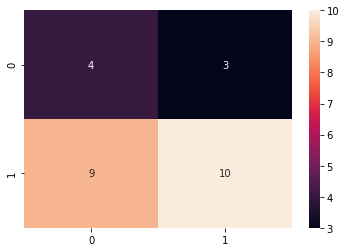

In [76]:
import seaborn as sns

sns.heatmap(confusion_matrix(testY, predictionY),annot=True)

In [77]:
svm_params = {
    'C':[1],
    'kernel':['rbf'],
    'gamma':[0.01]
}

In [78]:
from sklearn.model_selection import GridSearchCV

classifer = GridSearchCV(SVC(), svm_params, return_train_score=False, scoring='accuracy')

In [79]:
classifer.fit(trainX, trainY)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': [0.01], 'kernel': ['rbf']},
             scoring='accuracy')

In [80]:
svm_model = classifer.best_estimator_

In [81]:
svm_model.predict(testX)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

In [82]:
classifer.best_score_

0.55

# ANN Algorithm

In [83]:
import tensorflow.keras
from tensorflow.keras import Sequential, layers, losses, optimizers
from tensorflow.keras.layers import Dense

In [84]:
ANN_model = Sequential()

#Input_Layer
ANN_model.add(Dense(8, activation='relu', input_shape=trainX[6]))

#Hidden_Layer
ANN_model.add(Dense(16, activation='relu')),
ANN_model.add(Dense(32, activation='relu')),
ANN_model.add(Dense(64, activation='relu')),

#Output_Layer
ANN_model.add(Dense(1, activation='sigmoid'))

In [85]:
ANN_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )

In [86]:
ANN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4, 2, 4, 4, 4, 8)  40        
_________________________________________________________________
dense_9 (Dense)              (None, 4, 2, 4, 4, 4, 16) 144       
_________________________________________________________________
dense_10 (Dense)             (None, 4, 2, 4, 4, 4, 32) 544       
_________________________________________________________________
dense_11 (Dense)             (None, 4, 2, 4, 4, 4, 64) 2112      
_________________________________________________________________
dense_12 (Dense)             (None, 4, 2, 4, 4, 4, 1)  65        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [87]:
ANN_model.fit(trainX, trainY, epochs=10, verbose=1)

Epoch 1/10


ValueError: in user code:

    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 4 but received input with shape [None, 6]


In [ ]:
ANN_model.summary()

In [ ]:
ANN_model.history()

In [ ]:
#Prediction

ANN_prediction = ANN_model.predict(testX)
print("ANN Model Prediction", ANN_prediction)